In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

### Loading data into loans dataframe

In [3]:
loans = pd.read_csv("loan.csv",encoding="ISO-8859-1")
loans.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


### 1. Data Understanding
#### Describe loans dataframe

In [4]:
print(loans.describe())

                 id     member_id     loan_amnt   funded_amnt  \
count  3.971700e+04  3.971700e+04  39717.000000  39717.000000   
mean   6.831319e+05  8.504636e+05  11219.443815  10947.713196   
std    2.106941e+05  2.656783e+05   7456.670694   7187.238670   
min    5.473400e+04  7.069900e+04    500.000000    500.000000   
25%    5.162210e+05  6.667800e+05   5500.000000   5400.000000   
50%    6.656650e+05  8.508120e+05  10000.000000   9600.000000   
75%    8.377550e+05  1.047339e+06  15000.000000  15000.000000   
max    1.077501e+06  1.314167e+06  35000.000000  35000.000000   

       funded_amnt_inv   installment    annual_inc           dti  \
count     39717.000000  39717.000000  3.971700e+04  39717.000000   
mean      10397.448868    324.561922  6.896893e+04     13.315130   
std        7128.450439    208.874874  6.379377e+04      6.678594   
min           0.000000     15.690000  4.000000e+03      0.000000   
25%        5000.000000    167.020000  4.040400e+04      8.170000   
50%   

In [5]:
loans.shape

(39717, 111)

#### total number of columns = 111
#### total number of rows = 39717

#### Checking head of dataframe

In [6]:
loans.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


#### Checking datatypes of Loans dataframe columns

In [7]:
loans.dtypes

id                              int64
member_id                       int64
loan_amnt                       int64
funded_amnt                     int64
funded_amnt_inv               float64
                               ...   
tax_liens                     float64
tot_hi_cred_lim               float64
total_bal_ex_mort             float64
total_bc_limit                float64
total_il_high_credit_limit    float64
Length: 111, dtype: object

### Data Cleaning

#### Drop rows with NAN from emp_length

In [8]:
loans = loans.dropna(subset=['emp_length'])

In [9]:
loans['emp_length']

0        10+ years
1         < 1 year
2        10+ years
3        10+ years
4           1 year
           ...    
39712      4 years
39713      3 years
39714     < 1 year
39715     < 1 year
39716     < 1 year
Name: emp_length, Length: 38642, dtype: object

In [10]:
loans['emp_length'] = loans['emp_length'].replace({'years':''}, regex=True)
loans['emp_length'] = loans['emp_length'].replace({'year':''}, regex=True)
loans['emp_length'] = loans['emp_length'].replace({'< 1':0}, regex=True)
loans['emp_length'] = loans['emp_length'].str.replace('+','')

In [11]:
loans['emp_length'].isnull()

0        False
1         True
2        False
3        False
4        False
         ...  
39712    False
39713    False
39714     True
39715     True
39716     True
Name: emp_length, Length: 38642, dtype: bool

In [12]:
loans = loans.dropna(subset=['emp_length'])

In [13]:
loans['emp_length']=loans['emp_length'].astype(int)

In [14]:
print(loans['emp_length'].isnull().sum())

print(loans.emp_length.dtype)

0
int64


In [15]:
loans['emp_length'].head()
loans['emp_length'].shape

(34059,)

In [16]:
loans['int_rate'].head()
loans['int_rate']=loans['int_rate'].str.replace('%','')
loans['int_rate']=loans['int_rate'].astype(float)
loans['int_rate'].shape

(34059,)

In [17]:
round(100*(loans.isnull().sum()/len(loans.index)),2)

id                              0.00
member_id                       0.00
loan_amnt                       0.00
funded_amnt                     0.00
funded_amnt_inv                 0.00
                               ...  
tax_liens                       0.08
tot_hi_cred_lim               100.00
total_bal_ex_mort             100.00
total_bc_limit                100.00
total_il_high_credit_limit    100.00
Length: 111, dtype: float64

In [18]:
loans = loans.drop(['total_il_high_credit_limit','total_bc_limit','total_bal_ex_mort','tot_hi_cred_lim'],axis=1)
loans = loans.drop(['num_tl_op_past_12m','pct_tl_nvr_dlq','percent_bc_gt_75'],axis=1)
loans = loans.drop(['num_tl_120dpd_2m','num_tl_30dpd','num_tl_90g_dpd_24m'],axis=1)
loans = loans.drop(['num_rev_accts','num_rev_tl_bal_gt_0','num_sats'],axis=1)
loans = loans.drop(['num_bc_tl','num_il_tl','num_op_rev_tl'],axis=1)
loans = loans.drop(['num_actv_bc_tl','num_actv_rev_tl','num_bc_sats'],axis=1)
loans = loans.drop(['mths_since_recent_inq','mths_since_recent_revol_delinq','num_accts_ever_120_pd'],axis=1)
loans = loans.drop(['mort_acc','mths_since_recent_bc','mths_since_recent_bc_dlq'],axis=1)
loans = loans.drop(['mo_sin_old_rev_tl_op','mo_sin_rcnt_rev_tl_op','mo_sin_rcnt_tl'],axis=1)
loans = loans.drop(['mo_sin_old_il_acct'],axis=1)
loans = loans.drop(['bc_util'],axis=1)
loans = loans.drop(['bc_open_to_buy'],axis=1)
loans = loans.drop(['avg_cur_bal'],axis=1)
loans = loans.drop(['acc_open_past_24mths'],axis=1)
loans = loans.drop(['inq_last_12m'],axis=1)
loans = loans.drop(['chargeoff_within_12_mths'],axis=1)
loans = loans.drop(['inq_fi','total_cu_tl'],axis=1)
loans = loans.drop(['all_util','total_rev_hi_lim'],axis=1)
loans = loans.drop(['open_rv_24m','max_bal_bc'],axis=1)
loans = loans.drop(['il_util','open_rv_12m'],axis=1)
loans = loans.drop(['mths_since_rcnt_il','total_bal_il'],axis=1)
loans = loans.drop(['open_il_12m','open_il_24m'],axis=1)
loans = loans.drop(['open_acc_6m','open_il_6m'],axis=1)
loans = loans.drop(['tot_coll_amt','tot_cur_bal'],axis=1)
loans = loans.drop(['mths_since_last_major_derog','annual_inc_joint','dti_joint','verification_status_joint','next_pymnt_d','mths_since_last_record'],axis=1)
round(100*(loans.isnull().sum()/len(loans.index)),2)

id                             0.00
member_id                      0.00
loan_amnt                      0.00
funded_amnt                    0.00
funded_amnt_inv                0.00
term                           0.00
int_rate                       0.00
installment                    0.00
grade                          0.00
sub_grade                      0.00
emp_title                      3.11
emp_length                     0.00
home_ownership                 0.00
annual_inc                     0.00
verification_status            0.00
issue_d                        0.00
loan_status                    0.00
pymnt_plan                     0.00
url                            0.00
desc                          32.85
purpose                        0.00
title                          0.03
zip_code                       0.00
addr_state                     0.00
dti                            0.00
delinq_2yrs                    0.00
earliest_cr_line               0.00
inq_last_6mths              

In [19]:
loans.shape

(34059, 54)

In [20]:
loans[['emp_title','desc','mths_since_last_delinq','revol_util','last_pymnt_d','collections_12_mths_ex_med','pub_rec_bankruptcies','tax_liens']]

,emp_title,desc,mths_since_last_delinq,revol_util,last_pymnt_d,collections_12_mths_ex_med,pub_rec_bankruptcies,tax_liens
0,NaN,Borrower added on 12/22/11 > I need to upgra...,NaN,83.70%,Jan-15,0.0,0.0,0.0
2,NaN,NaN,NaN,98.50%,Jun-14,0.0,0.0,0.0
3,AIR RESOURCES BOARD,Borrower added on 12/21/11 > to pay for prop...,35.0,21%,Jan-15,0.0,0.0,0.0
4,University Medical Group,Borrower added on 12/21/11 > I plan on combi...,38.0,53.90%,May-16,0.0,0.0,0.0
5,Veolia Transportaton,NaN,NaN,28.30%,Jan-15,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
39708,Millenium Group,I would like to pay off my high-interest credi...,0.0,48.60%,Jul-10,NaN,NaN,NaN
39710,Rush Univ Med Grp,NaN,0.0,0.60%,Jul-10,NaN,NaN,NaN
39711,"A. F. Wolfers, Inc.",I'd like to shift some credit card debt so it ...,0.0,23%,Jul-10,NaN,NaN,NaN
39712,FiSite Research,Our current gutter system on our home is old a...,0.0,13.10%,Jul-10,NaN,NaN,NaN


### Using below formula figured out some more columns to drop
round(100*(loans.isnull().sum()/len(loans.index)),2)
temp = loans['tax_liens']>0.0
print(temp.value_counts())

In [21]:
loans = loans.drop(['pub_rec_bankruptcies'],axis=1)
loans = loans.drop(['tax_liens'],axis=1)
loans = loans.drop(['delinq_amnt'],axis=1)
loans = loans.drop(['acc_now_delinq'],axis=1)
loans = loans.drop(['collections_12_mths_ex_med'],axis=1)
loans.shape

(34059, 49)

##### Dropping some of the customer behavior columns which will not be available when new applicant fills up the application

In [22]:
loans.shape
loans = loans.drop(['delinq_2yrs','mths_since_last_delinq','revol_bal','recoveries','collection_recovery_fee','last_pymnt_d','last_pymnt_amnt','revol_util'],axis=1)
round(100*(loans.isnull().sum()/len(loans.index)),2)

id                      0.00
member_id               0.00
loan_amnt               0.00
funded_amnt             0.00
funded_amnt_inv         0.00
term                    0.00
int_rate                0.00
installment             0.00
grade                   0.00
sub_grade               0.00
emp_title               3.11
emp_length              0.00
home_ownership          0.00
annual_inc              0.00
verification_status     0.00
issue_d                 0.00
loan_status             0.00
pymnt_plan              0.00
url                     0.00
desc                   32.85
purpose                 0.00
title                   0.03
zip_code                0.00
addr_state              0.00
dti                     0.00
earliest_cr_line        0.00
inq_last_6mths          0.00
open_acc                0.00
pub_rec                 0.00
total_acc               0.00
initial_list_status     0.00
out_prncp               0.00
out_prncp_inv           0.00
total_pymnt             0.00
total_pymnt_in

In [23]:
loans['loan_status']

0        Fully Paid
2        Fully Paid
3        Fully Paid
4           Current
5        Fully Paid
            ...    
39708    Fully Paid
39710    Fully Paid
39711    Fully Paid
39712    Fully Paid
39713    Fully Paid
Name: loan_status, Length: 34059, dtype: object

#### Target variable - loan_status
#### Dropping rows with Current

In [25]:
loans = loans[~(loans.loan_status == "Current")]

### Derived Metrics - adding column to dataframe having values as 0 if loan_status == "Fully Paid" and 1 if loan_status == "Charged Off"

In [26]:
loans['loan_status_targetcolumn'] = np.where(loans['loan_status']== 'Fully Paid', 0, 1)

In [27]:
loans.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,last_credit_pull_d,policy_code,application_type,loan_status_targetcolumn
0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,...,0.0,5863.155187,5833.84,5000.00,863.16,0.00,May-16,1,INDIVIDUAL,0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,...,0.0,3005.666844,3005.67,2400.00,605.67,0.00,May-16,1,INDIVIDUAL,0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,...,0.0,12231.890000,12231.89,10000.00,2214.92,16.97,Apr-16,1,INDIVIDUAL,0
5,1075269,1311441,5000,5000,5000.0,36 months,7.90,156.46,A,A4,...,0.0,5632.210000,5632.21,5000.00,632.21,0.00,Jan-16,1,INDIVIDUAL,0
6,1069639,1304742,7000,7000,7000.0,60 months,15.96,170.08,C,C5,...,0.0,10110.840000,10110.84,6985.61,3125.23,0.00,May-16,1,INDIVIDUAL,0


In [28]:
loans['count_rowwise'] = loans.reset_index().index

#### Univariate analysis


#### Categorical Variables

#### Bar plot - how many people defaulted and not defaulted
loan_status vs count of people

<AxesSubplot:xlabel='loan_status', ylabel='count_rowwise'>

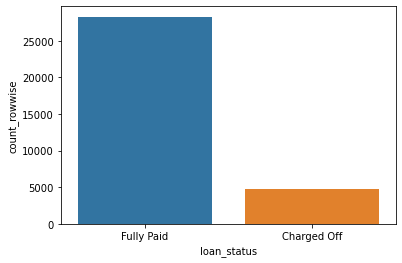

In [29]:

sns.barplot(data=loans,x='loan_status',y='count_rowwise',estimator=np.count_nonzero)

In [30]:
loans_temp = loans[(loans['loan_status']=='Fully Paid')]
print(loans_temp['loan_status'].count())
loans_temp = loans[~(loans['loan_status']=='Fully Paid')]
print(loans_temp['loan_status'].count())

28276
4760


#### Bar plot - Term vs count of people

<AxesSubplot:xlabel='term', ylabel='count_rowwise'>

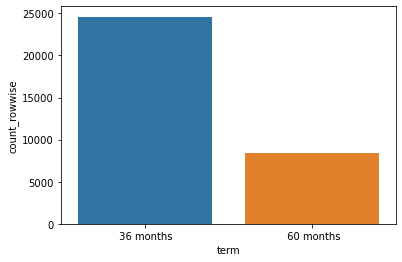

In [31]:
sns.barplot(data=loans,x='term',y='count_rowwise',estimator=np.count_nonzero)

#### Bar plot - Term vs Grade

<AxesSubplot:xlabel='grade', ylabel='count_rowwise'>

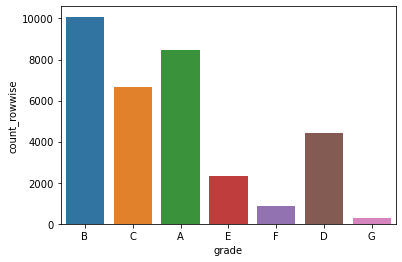

In [32]:
sns.barplot(data=loans,x='grade',y='count_rowwise',estimator=np.count_nonzero)

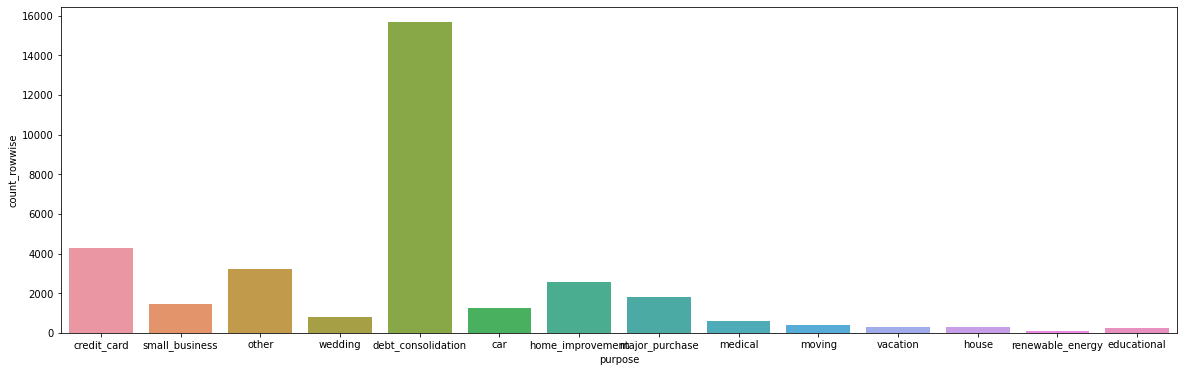

In [33]:
fig, ax = plt.subplots(figsize=(20, 6))
sns.barplot(data=loans,x='purpose',y='count_rowwise', ax=ax, estimator=np.count_nonzero)
plt.show()

#### Continuous Variables


#### Plotting Histogram - Loan Amount

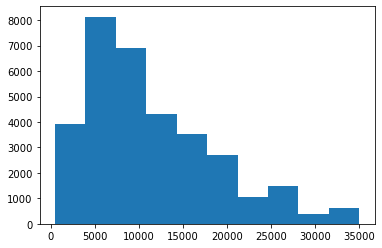

In [34]:
from scipy.stats import norm

plt.hist(loans.loan_amnt)
plt.show()

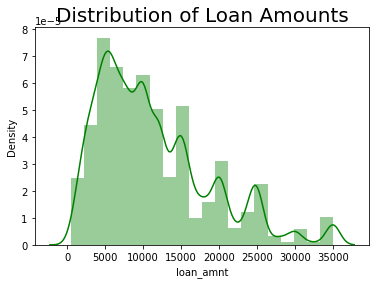

In [35]:
sns.distplot(loans.loan_amnt,bins=20,color='g')
plt.title('Distribution of Loan Amounts',fontsize=20)
plt.show()

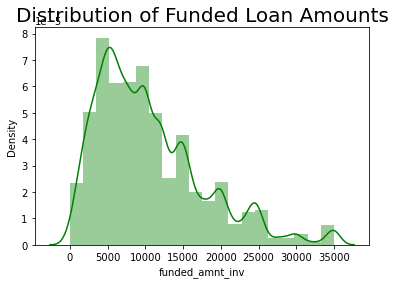

In [36]:
sns.distplot(loans.funded_amnt_inv,bins=20,color='g')
plt.title('Distribution of Funded Loan Amounts',fontsize=20)
plt.show()

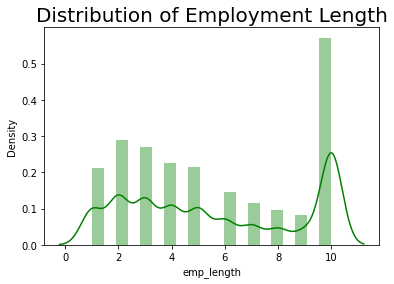

In [37]:
sns.distplot(loans.emp_length,bins=20,color='g')
plt.title('Distribution of Employment Length',fontsize=20)
plt.show()

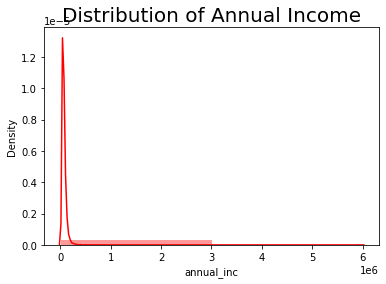

In [38]:
sns.distplot(loans.annual_inc,bins=2,color='r')
plt.title('Distribution of Annual Income',fontsize=20)
plt.show()

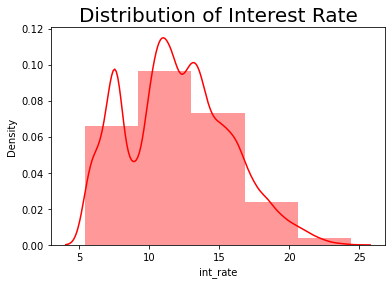

In [39]:
sns.distplot(loans.int_rate,bins=5,color='r')
plt.title('Distribution of Interest Rate',fontsize=20)
plt.show()

#### Bar plot - Default Rate vs Term

In [40]:
print(sum(loans['loan_status_targetcolumn'])/loans['loan_status_targetcolumn'].count())

0.1440852403438673


In [41]:
loans['default_rate'] = sum(loans['loan_status_targetcolumn'])/loans['loan_status_targetcolumn'].count()

<AxesSubplot:xlabel='term', ylabel='loan_status_targetcolumn'>

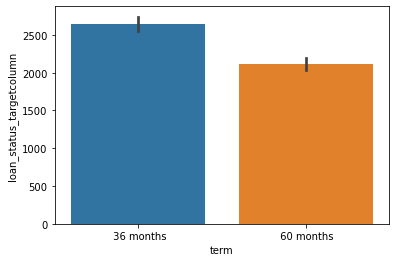

In [42]:
sns.barplot(data=loans,x='term',y='loan_status_targetcolumn',estimator=np.count_nonzero)

In [43]:

loans.groupby(['term']).loan_status_targetcolumn.agg(['count','sum'])

,count,sum
term,,
36 months,24608,2644
60 months,8428,2116


#### Bivariate analysis

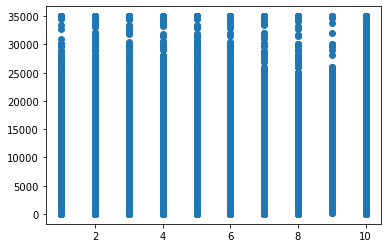

In [48]:
plt.scatter(loans.emp_length,loans.funded_amnt_inv)
plt.show()

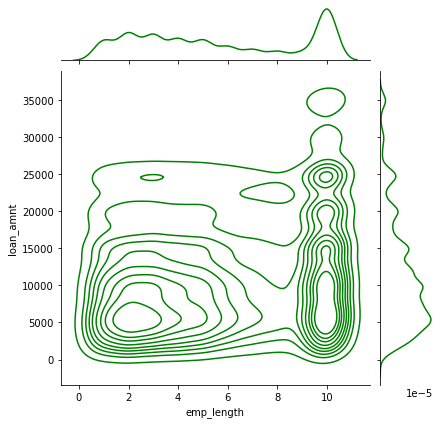

In [49]:
sns.jointplot(loans.emp_length,loans.loan_amnt,kind='kde',color='g')

<AxesSubplot:xlabel='purpose'>

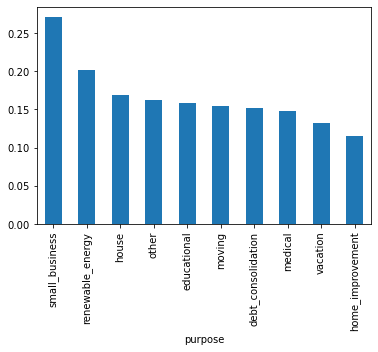

In [50]:
loans.groupby(['purpose'])['loan_status_targetcolumn'].mean().sort_values(ascending=False).head(10).plot.bar()

<AxesSubplot:xlabel='term'>

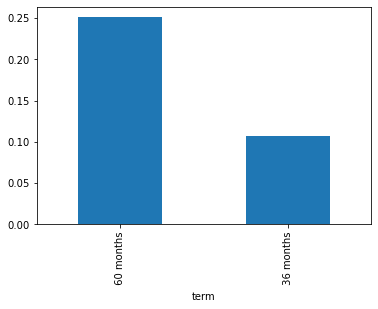

In [51]:
loans.groupby(['term'])['loan_status_targetcolumn'].mean().sort_values(ascending=False).head(5).plot.bar()

<AxesSubplot:xlabel='emp_length', ylabel='term'>

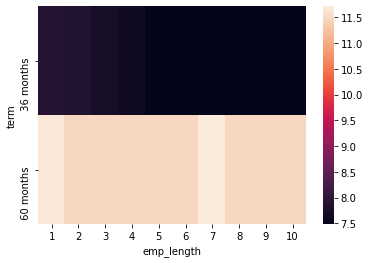

In [53]:
res = pd.pivot_table(data=loans,index="term",columns="emp_length",values="int_rate",aggfunc=lambda x: np.quantile(x,0.2))
sns.heatmap(res)

<AxesSubplot:xlabel='grade'>

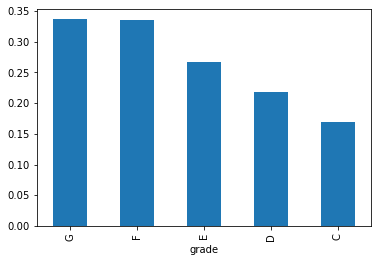

In [54]:
loans.groupby(['grade'])['loan_status_targetcolumn'].mean().sort_values(ascending=False).head(5).plot.bar()

<AxesSubplot:xlabel='sub_grade'>

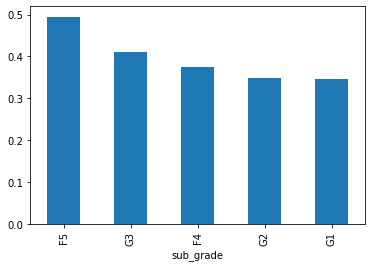

In [55]:
loans.groupby(['sub_grade'])['loan_status_targetcolumn'].mean().sort_values(ascending=False).head(5).plot.bar()

<AxesSubplot:xlabel='grade', ylabel='loan_status'>

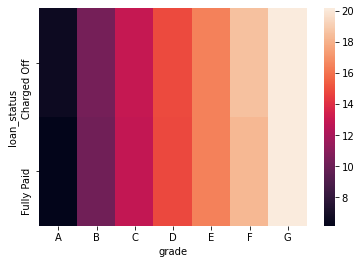

In [56]:
res = pd.pivot_table(data=loans,index="loan_status",columns="grade",values="int_rate",aggfunc=lambda x: np.quantile(x,0.2))
sns.heatmap(res)

<AxesSubplot:xlabel='emp_length', ylabel='loan_status'>

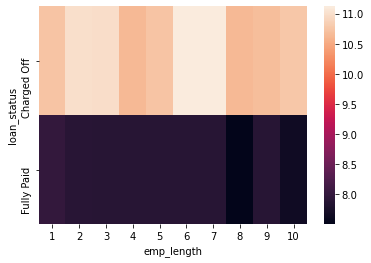

In [57]:
res = pd.pivot_table(data=loans,index="loan_status",columns="emp_length",values="int_rate",aggfunc=lambda x: np.quantile(x,0.2))
sns.heatmap(res)

<AxesSubplot:xlabel='sub_grade', ylabel='loan_status'>

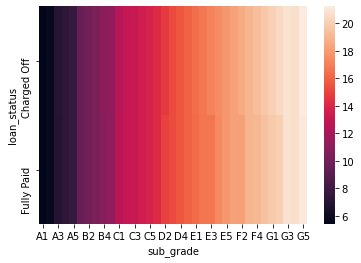

In [58]:
res = pd.pivot_table(data=loans,index="loan_status",columns="sub_grade",values="int_rate",aggfunc=lambda x: np.quantile(x,0.2))
sns.heatmap(res)

<AxesSubplot:xlabel='term', ylabel='loan_status'>

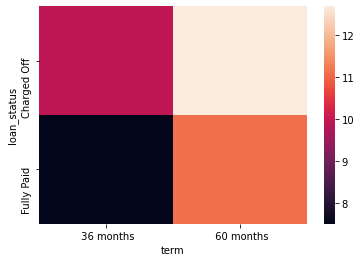

In [59]:
res = pd.pivot_table(data=loans,index="loan_status",columns="term",values="int_rate",aggfunc=lambda x: np.quantile(x,0.2))
sns.heatmap(res)

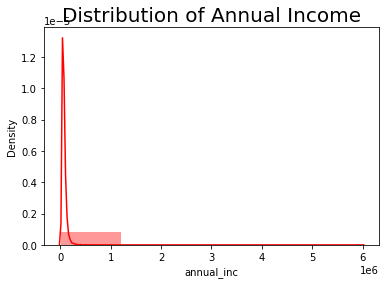

In [60]:
sns.distplot(loans.annual_inc,bins=5,color='r')
plt.title('Distribution of Annual Income',fontsize=20)
plt.show()

In [143]:
loans['annualincome_dti'] = loans['dti']/loans['annual_inc']

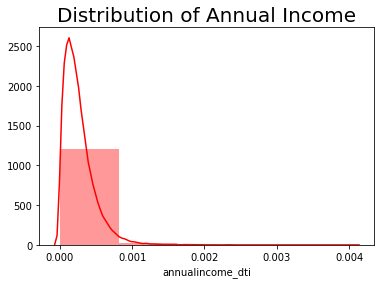

In [146]:
sns.distplot(loans.annualincome_dti,bins=5,color='r')
plt.title('Distribution of Annual Income',fontsize=20)
plt.show()

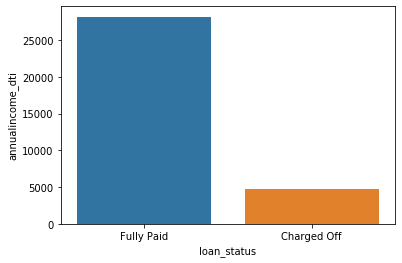

In [147]:
sns.barplot(data=loans,x='loan_status',y='annualincome_dti',estimator=np.count_nonzero)

### Conclusion and Recommendations

#### People with higher Grade, Sub Grade are less likely to be Defaulters
#### People with lower Grade, Sub Grade are more likely to be Defaulters and can be asked for more Interest Rate
#### People with 60 months term can be applied with more interest rate than people with 36 months term
#### Top 5 purpose for which people are taking loans - small_business, renewable_energy, house, other, educational
#### People with more emplyment length are given more amount of loans
#### People with higher DTI/Monthly Income ratio are lesser likely to be defaulters